<a href="https://colab.research.google.com/github/pavan-07/-roboFoodDelivery/blob/main/Part3_LDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Topic Modelling - Latent Dirichlet Allocation (LDA)**

This notebook covers the topic modelling section for the recommendation engine.

Topic modeling is a statistical technique that identifies the underlying themes or "topics" in a set of documents. Latent Dirichlet Allocation (LDA) is a popular example of topic modeling. LDA helps categorize text in a document into a specific topic by creating a model for topics within documents and words within topics, which are represented as Dirichlet distributions.


In [1]:
#Installing stylecloud
!pip install stylecloud
import nltk
nltk.download('stopwords')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 262.1/262.1 kB 5.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 161.4/161.4 kB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.3/88.3 kB 4.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.8/87.8 kB 4.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for stylecloud: filename=stylecloud-0.5.2-py3-none-any.whl size=259507 sha256=f646d81d8c72f6e1312c7b8d5ec42f2235cb8a1fe7490d967752e268204e0f46
  Stored in directory: /root/.cache/pip/wheels/aa/c8/27/9374f4fc7133015d902b5e2c75ad951edd57eb1ae948495915
  Created wheel for fire: filename=fire-0.5.0-py2.py3-none-any.whl size=116952 sha256=00a82809b1fdea473e9af4d04f76ac2930301e975f769165182502a8f510164f
  Stored in directory: /root/.cache/pip

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [32]:
!pip install -U Kaleido

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 9.1 MB/s eta 0:00:00


In [2]:
!pip install gensim==3.8.3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.4/23.4 MB 57.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for gensim
  Running setup.py clean for gensim
Failed to build gensim
  Attempting uninstall: gensim
    Found existing installation: gensim 4.3.1
    Uninstalling gensim-4.3.1:
      Successfully uninstalled gensim-4.3.1
  error: subprocess-exited-with-error
  
  × Running setup.py install for gensim did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Running setup.py install for gensim ... error
  

In [3]:
## Importing Basic Packages
import csv
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import sys
pd.set_option('display.max_columns', 50)

import plotly 
import plotly.offline as py
import plotly.graph_objs as go
import plotly.express as px
from plotly.offline import init_notebook_mode, plot, iplot


import sklearn
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

import re
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
from bs4 import BeautifulSoup
from wordcloud import WordCloud
import stylecloud


from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use', 'not', 'would', 'say', 'could', '_', 'be', 'know', 'good', 'go', 'get', 'do', 'done', 'try', 'many', 'some', 'nice', 'thank', 'think', 'see', 'rather', 'easy', 'easily', 'lot', 'lack', 'make', 'want', 'seem', 'run', 'need', 'even', 'right', 'line', 'even', 'also', 'may', 'take', 'come'])


import gensim, spacy, logging, warnings
import gensim.corpora as corpora
from gensim.utils import simple_preprocess

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# Reading the reviews sentiment scores
all_reviews = pd.read_csv("/content/drive/MyDrive/reviews_sentiment_scores.csv")

In [6]:
all_reviews.drop(['Unnamed: 0'], axis=1, inplace = True)
print(all_reviews.shape)
all_reviews.head(3)

(48449, 22)


,user_id,business_id,stars,useful,funny,cool,text,date,year,month,time,word_count,character_count,avg_word_length,count_of_stopwords,cleaned_text,polarity,subjectivity,neg,neu,pos,compound
0,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5,1,0,1,"Wow! Yummy, different, delicious. Our favo...",1/4/2015 0:01,2015,1,0:01:03,48,243,4.900000,12,wow yummy different delicious favorite lamb cu...,0.315152,0.733838,0.000,0.660,0.340,0.9588
1,aFa96pz67TwOFu4Weq5Agg,kq5Ghhh14r-eCxlVmlyd8w,5,0,0,0,My boyfriend and I tried this deli for the fir...,8/23/2018 21:39,2018,8,21:39:38,73,393,4.397260,25,boyfriend tried deli first time today turkey a...,0.138889,0.492593,0.000,0.843,0.157,0.9168
2,G0DHgkSsDozqUPWtlxVEMw,oBhJuukGRqPVvYBfTkhuZA,4,0,0,0,The only reason I didn't give this restaurant ...,3/5/2015 3:37,2015,3,3:37:54,422,2343,4.547393,177,reason didnt give restaurant 5 star rating one...,0.093537,0.476332,0.053,0.857,0.089,0.9305


In [7]:
# Filtering for reviews that have 0.0 scores across 3 metrics: polarity, subjectivity, compound

reviews_dropped = all_reviews[(all_reviews.polarity == 0.0) & (all_reviews.compound == 0.0) & (all_reviews.subjectivity == 0.0)]
reviews_dropped = pd.DataFrame(reviews_dropped)  # Convert to DataFrame

print(reviews_dropped.shape)
reviews_dropped.sample(5)

(59, 22)


,user_id,business_id,stars,useful,funny,cool,text,date,year,month,time,word_count,character_count,avg_word_length,count_of_stopwords,cleaned_text,polarity,subjectivity,neg,neu,pos,compound
5312,CBHSb1uXN6LKXqTDeRzekg,y44MbCvvtmg1FpkNGSWisw,2,0,0,0,The quality ingredients make for a tasty eat. ...,6/28/2015 15:57,2015,6,15:57:07,39,218,4.615385,13,quality ingredient make tasty eat cholesterol ...,0.0,0.0,0.0,1.0,0.0,0.0
44307,KrXr7kV-JWfOQow0sCjgjg,POuaebsAeCyNx-8qZ3O7XQ,1,0,0,0,12/27日去这家店里点了酱鸭，我的家人吃了后当晩不舒服，拉肚子，第二天28日下午去店里找经...,12/29/2016 21:25,2016,12,21:25:32,1,146,146.000000,0,1227日去这家店里点了酱鸭我的家人吃了后当晩不舒服拉肚子第二天28日下午去店里找经理解决一...,0.0,0.0,0.0,1.0,0.0,0.0
23124,M70ofl616OAi8a7Q9pf-yw,YAUUdbESr8BYQ_TFgDjT5Q,5,0,0,0,This is my go-to for Japanese. I get two order...,9/23/2020 13:09,2020,9,13:09:06,40,216,4.425000,14,goto japanese get two order gyozas variety sus...,0.0,0.0,0.0,1.0,0.0,0.0
25648,iZFGhMhdbGnbdjLhX3MIAw,s3Q1J4XEVOBiZy9dYUpqpg,1,1,0,0,Never coming back to this location again! This...,7/4/2021 13:52,2021,7,13:52:33,18,97,4.444444,8,never coming back location silverware wrapped ...,0.0,0.0,0.0,1.0,0.0,0.0
33155,Wl1QrFoRSL1l4-yLDd276w,iZNR8-rqsBL2afDk4Zxe8A,5,0,0,0,http://www.yelp.com/biz_photos/iZNR8-rqsBL2afD...,11/6/2015 2:06,2015,11,2:06:50,1,101,101.000000,0,httpwwwyelpcombiz_photosiznr8rqsbl2afdk4zxe8as...,0.0,0.0,0.0,1.0,0.0,0.0



The table shows that some of the reviews appear to be written in languages other than English or are nonsensical. This means that sentiment analysis tools cannot provide meaningful scores for these reviews. Therefore, we will be eliminating these 59 rows of reviews from the project.

In [8]:
# Dropping these filtered rows

all_reviews = all_reviews.drop(index = reviews_dropped.index)
print(all_reviews.shape)
all_reviews.sample(3)

(48390, 22)


,user_id,business_id,stars,useful,funny,cool,text,date,year,month,time,word_count,character_count,avg_word_length,count_of_stopwords,cleaned_text,polarity,subjectivity,neg,neu,pos,compound
24011,MgVnpA76FgNZ6_yTaN04Cg,PYUI1OJVksGUbCrteU68bw,5,1,1,0,Love this place! Vegan wings and pizza fries a...,8/14/2020 21:25,2020,8,21:25:33,22,117,4.363636,8,love place vegan wing pizza fry amazing may li...,0.342500,0.600,0.00,0.631,0.369,0.9020
33990,k0sQqvbjoo9tymI909jrtg,s2JiYzE7i68cXIV6YEcVTw,5,0,0,0,Stopped here for lunch and really enjoyed the ...,3/19/2016 2:19,2016,3,2:19:40,64,340,4.328125,25,stopped lunch really enjoyed food server atten...,0.495833,0.650,0.02,0.794,0.186,0.9037
3150,WDW7cqr-qhqARM_MDXCcGg,DOl21AqtT74dUZ3kvXNNcA,3,0,0,0,I ordered to go for lunch and was expecting mo...,8/24/2018 18:02,2018,8,18:02:45,83,422,4.197531,40,ordered go lunch expecting yelp review ok roti...,0.130556,0.525,0.00,0.954,0.046,0.5927


In [9]:
# Converting words in reviews to a list

def sent_to_words(sentences):
    for sent in sentences:
        sent = re.sub('\s+', ' ', sent)  # remove newline chars
        sent = re.sub("\'", "", sent)  # remove single quotes
        sent = gensim.utils.simple_preprocess(str(sent), deacc=True) 
        yield(sent)  

# Convert to list

data_list = all_reviews.text.values.tolist()
data_inwords = list(sent_to_words(data_list))
print(data_inwords[:1])

[['wow', 'yummy', 'different', 'delicious', 'our', 'favorite', 'is', 'the', 'lamb', 'curry', 'and', 'korma', 'with', 'different', 'kinds', 'of', 'naan', 'dont', 'let', 'the', 'outside', 'deter', 'you', 'because', 'we', 'almost', 'changed', 'our', 'minds', 'go', 'in', 'and', 'try', 'something', 'new', 'youll', 'be', 'glad', 'you', 'did']]


In [10]:
# Text Processing

import spacy

def process_words(texts, stop_words=stop_words, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """Remove Stopwords and Lemmatization"""
    texts = [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]
    texts_out = []
    nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
        
    # remove stopwords once more after lemmatization
    texts_out = [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts_out]    
    return texts_out

data_new = process_words(data_inwords)

In [11]:
# Create Dictionary

id2word = corpora.Dictionary(data_new)

# Create Corpus: Term Document Frequency

corpus = [id2word.doc2bow(text) for text in data_new]

In [12]:
# Build LDA model

model_lda = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=5,
                                           random_state=42,
                                           chunksize=250,
                                           passes=5,
                                           alpha='auto',
                                           iterations=10,
                                           per_word_topics=False)

In [13]:
# Overview of Dominant Topics

print(model_lda.print_topics())

[(0, '0.038*"beer" + 0.036*"drink" + 0.028*"bar" + 0.022*"coffee" + 0.020*"pizza" + 0.019*"selection" + 0.018*"burger" + 0.014*"cocktail" + 0.014*"cake" + 0.012*"happy"'), (1, '0.043*"food" + 0.041*"great" + 0.036*"place" + 0.022*"service" + 0.016*"love" + 0.015*"restaurant" + 0.014*"definitely" + 0.013*"really" + 0.013*"menu" + 0.012*"well"'), (2, '0.018*"fry" + 0.015*"sauce" + 0.015*"flavor" + 0.015*"cheese" + 0.015*"salad" + 0.014*"chicken" + 0.014*"taste" + 0.013*"dish" + 0.013*"pork" + 0.013*"meat"'), (3, '0.026*"table" + 0.026*"wait" + 0.018*"ask" + 0.014*"minute" + 0.014*"service" + 0.013*"server" + 0.013*"seat" + 0.012*"sit" + 0.012*"tell" + 0.011*"waitress"'), (4, '0.047*"order" + 0.026*"time" + 0.018*"give" + 0.015*"place" + 0.015*"food" + 0.014*"eat" + 0.013*"sandwich" + 0.011*"never" + 0.011*"star" + 0.011*"bad"')]


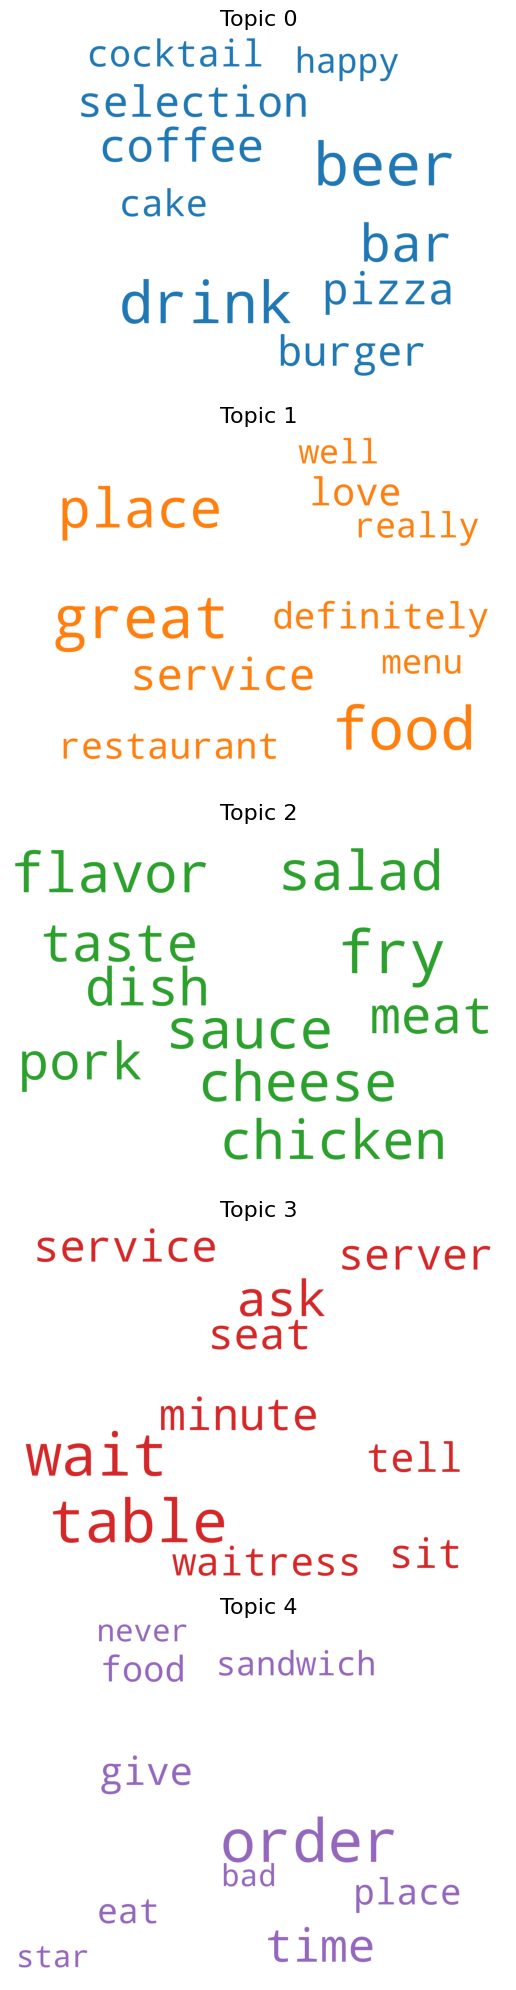

In [14]:
# Wordcloud of Top N words in each topic
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=stop_words,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = model_lda.show_topics(formatted=False)

fig, axes = plt.subplots(5, 1, figsize=(20,20), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

Based on these plots we can deduce that Topics 0 & 2 showcases words belonging to Western Restaurants. Topic 1 showcases words belonging to positive reviews. Topic 3 describes words belonging to neutral reviews and Topic 4 showcases words belonging to negative reviews.

In [15]:
!pip install pyLDAvis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 38.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 51.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 38.9 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.22.4
    Uninstalling numpy-1.22.4:
      Successfully uninstalled numpy-1.22.4
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pandas-1.5.3:
      Successfully uninstalled pandas-1.5.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.12.0 requires numpy<1.24,>=1.22, but you have numpy 1.24.3 which is incompatible.
numba 0.56.4 requires numpy<1.24,>=1.18, but you have numpy 1.24.3 which is incompatibl

In [16]:
!pip uninstall pandas
!pip install pandas==1.5.3

Found existing installation: pandas 2.0.1
Uninstalling pandas-2.0.1:
  Would remove:
    /usr/local/lib/python3.10/dist-packages/pandas-2.0.1.dist-info/*
    /usr/local/lib/python3.10/dist-packages/pandas/*
Proceed (Y/n)? y
  Successfully uninstalled pandas-2.0.1
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 81.9 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pyldavis 3.4.1 requires pandas>=2.0.0, but you have pandas 1.5.3 which is incompatible.


In [17]:
!pip install pyLDAvis gensim

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached pandas-2.0.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (12.3 MB)
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pandas-1.5.3:
      Successfully uninstalled pandas-1.5.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas~=1.5.3, but you have pandas 2.0.1 which is incompatible.


In [19]:
!pip install pyLDAvis

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [21]:
!pip uninstall pandas
!pip install pandas==1.5.3

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Found existing installation: pandas 2.0.1
Uninstalling pandas-2.0.1:
  Would remove:
    /usr/local/lib/python3.10/dist-packages/pandas-2.0.1.dist-info/*
    /usr/local/lib/python3.10/dist-packages/pandas/*
Proceed (Y/n)? y
  Successfully uninstalled pandas-2.0.1
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached pandas-1.5.3-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (12.1 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pyldavis 3.4.1 requires pandas>=2.0.0, but you have pandas 1.5.3 which is incompatible.


In [33]:
# 5 topics

import pyLDAvis.gensim
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(model_lda, corpus, dictionary=model_lda.id2word)
vis

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1     -0.076929 -0.006494       1        1  31.909353
4     -0.219186 -0.045438       2        1  21.177649
2      0.117525 -0.310803       3        1  20.355195
3     -0.141444  0.195068       4        1  17.461558
0      0.320034  0.167668       5        1   9.096245, topic_info=        Term          Freq         Total Category  logprob  loglift
78     great  24055.000000  24055.000000  Default  30.0000  30.0000
100    order  22538.000000  22538.000000  Default  29.0000  29.0000
102    place  26531.000000  26531.000000  Default  28.0000  28.0000
62     drink   8760.000000   8760.000000  Default  27.0000  27.0000
151     beer   6322.000000   6322.000000  Default  26.0000  26.0000
..       ...           ...           ...      ...      ...      ...
966    space   1028.601626   1709.925458   Topic5  -5.0815   1.8891
304    light    821.302643   1516.275241   Topic5  -5.3065   1.7842
618  dessert    779.807432   2674.041707   Topic5  -5.3584   1.1650
671    cream    726.194188   2173.594103   Topic5  -5.4296   1.3010
243      top    635.490365   3309.018325   Topic5  -5.5630   0.7473

[320 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
1135      1  0.980287  absolutely
1135      2  0.005675  absolutely
1135      4  0.014187  absolutely
32        2  0.817075    actually
32        3  0.129768    actually
...     ...       ...         ...
410       4  0.016493       write
360       2  0.999152       wrong
4267      5  0.999211        yard
348       1  0.249004        year
348       2  0.750631        year

[510 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 5, 3, 4, 1])

In [25]:
def format_topics_sentences(model_lda=None, corpus=corpus, texts=data_new):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row_list in enumerate(model_lda[corpus]):
        row = row_list[0] if model_lda.per_word_topics else row_list            
        # print(row)
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = model_lda.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [26]:
df_topic_sents_keywords = format_topics_sentences(model_lda=model_lda, corpus=corpus, texts=data_new)

Streaming output truncated to the last 5000 lines.
<ipython-input-25-842564291f1f>:15: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-25-842564291f1f>:15: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-25-842564291f1f>:15: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-25-842564291f1f>:15: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-25-842564291f1f>:15: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-25-842564291f1f>:15: FutureWarning:

The frame.append method is deprecated and 

In [27]:
# Format
dominant_topic_df = df_topic_sents_keywords.reset_index()
dominant_topic_df.columns = ['Document_No', 'Dominant_Topic', 'Keywords', 'Text']
print(dominant_topic_df.shape)
dominant_topic_df.head(10)

(48390, 4)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,Document_No,Dominant_Topic,Keywords,Text
0,0,4,"order, time, give, place, food, eat, sandwich,...","[different, favorite, different, kind, let, ou..."
1,1,1,"food, great, place, service, love, restaurant,...","[boyfriend, deli, first, time, today, definite..."
2,2,3,"table, wait, ask, minute, service, server, sea...","[reason, give, restaurant, star, rating, singl..."
3,3,1,"food, great, place, service, love, restaurant,...","[visit, pick, pack, beer, night, end, stay, pl..."
4,4,1,"food, great, place, service, love, restaurant,...","[spot, night, bum, close, pleasantly, surprise..."
5,5,1,"food, great, place, service, love, restaurant,...","[awesome, freshly, fill, ordered, fill, phenom..."
6,6,3,"table, wait, ask, minute, service, server, sea...","[number, dog, friendly, hotel, city, expect, u..."
7,7,2,"fry, sauce, flavor, cheese, salad, chicken, ta...","[airport, grab, restaurant, earl, decent, job,..."
8,8,3,"table, wait, ask, minute, service, server, sea...","[share, main, issue, share, reason, give, star..."
9,9,2,"fry, sauce, flavor, cheese, salad, chicken, ta...","[wee, bit, pricey, portion, serve, beck, gator..."


In [28]:
# Append new columns onto reviews dataset

dominant_topic_df['Text_Chunks'] = dominant_topic_df['Text']
additional_feature_columns = dominant_topic_df[['Dominant_Topic', 'Keywords', 'Text_Chunks']]
reviews_final = pd.concat([all_reviews,additional_feature_columns], axis=1).reindex(all_reviews.index)
reviews_final.head(10)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,user_id,business_id,stars,useful,funny,cool,text,date,year,month,time,word_count,character_count,avg_word_length,count_of_stopwords,cleaned_text,polarity,subjectivity,neg,neu,pos,compound,Dominant_Topic,Keywords,Text_Chunks
0,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5.0,1.0,0.0,1.0,"Wow! Yummy, different, delicious. Our favo...",1/4/2015 0:01,2015.0,1.0,0:01:03,48.0,243.0,4.900000,12.0,wow yummy different delicious favorite lamb cu...,0.315152,0.733838,0.000,0.660,0.340,0.9588,4.0,"order, time, give, place, food, eat, sandwich,...","[different, favorite, different, kind, let, ou..."
1,aFa96pz67TwOFu4Weq5Agg,kq5Ghhh14r-eCxlVmlyd8w,5.0,0.0,0.0,0.0,My boyfriend and I tried this deli for the fir...,8/23/2018 21:39,2018.0,8.0,21:39:38,73.0,393.0,4.397260,25.0,boyfriend tried deli first time today turkey a...,0.138889,0.492593,0.000,0.843,0.157,0.9168,1.0,"food, great, place, service, love, restaurant,...","[boyfriend, deli, first, time, today, definite..."
2,G0DHgkSsDozqUPWtlxVEMw,oBhJuukGRqPVvYBfTkhuZA,4.0,0.0,0.0,0.0,The only reason I didn't give this restaurant ...,3/5/2015 3:37,2015.0,3.0,3:37:54,422.0,2343.0,4.547393,177.0,reason didnt give restaurant 5 star rating one...,0.093537,0.476332,0.053,0.857,0.089,0.9305,3.0,"table, wait, ask, minute, service, server, sea...","[reason, give, restaurant, star, rating, singl..."
3,mNITUu6B2wUKBOa4NmUHJg,NQSnr4RPUScss607oxOaqw,5.0,0.0,0.0,0.0,My brother came to visit and we wanted to pick...,5/19/2016 6:10,2016.0,5.0,6:10:14,63.0,330.0,4.253968,27.0,brother came visit wanted pick six pack good b...,0.626667,0.723333,0.000,0.756,0.244,0.9545,1.0,"food, great, place, service, love, restaurant,...","[visit, pick, pack, beer, night, end, stay, pl..."
4,aWlojpSpzEICTza3RgGJgg,SIoCIxjn4jLt2O-4DajWJw,4.0,0.0,0.0,0.0,My go-to spot on a Saturday night! I was real ...,11/18/2015 17:47,2015.0,11.0,17:47:29,72.0,396.0,4.438356,26.0,goto spot saturday night real bummed lucy clos...,0.000833,0.588333,0.057,0.720,0.224,0.9363,1.0,"food, great, place, service, love, restaurant,...","[spot, night, bum, close, pleasantly, surprise..."
5,Z5j9Xw_G0c7M2b1-iS67wg,HTqXI5S2XcSlh_ylx9sE6g,5.0,1.0,1.0,1.0,I've only had the cannolis here but they are a...,3/23/2018 14:35,2018.0,3.0,14:35:33,44.0,256.0,4.840909,21.0,ive cannolis awesome theyre freshly filled ord...,0.541667,0.758333,0.095,0.616,0.288,0.9314,1.0,"food, great, place, service, love, restaurant,...","[awesome, freshly, fill, ordered, fill, phenom..."
6,xE7AXFF9wVaN6id6OCtH3Q,D5V0Fawd6ODVgqCY8xngsw,4.0,1.0,0.0,2.0,I have been to a number of dog friendly hotels...,1/14/2017 21:05,2017.0,1.0,21:05:04,202.0,1057.0,4.188119,87.0,number dog friendly hotelsjust city know expec...,0.381771,0.548958,0.029,0.735,0.237,0.9929,3.0,"table, wait, ask, minute, service, server, sea...","[number, dog, friendly, hotel, city, expect, u..."
7,hWDybu_KvYLSdEFzGrniTw,roc-xyyzN5b_nImb0NdRLQ,4.0,6.0,5.0,5.0,"As airport grab-and-go restaurants are, Earl d...",1/3/2015 23:16,2015.0,1.0,23:16:09,101.0,549.0,4.382353,37.0,airport grabandgo restaurant earl decent job v...,0.433929,0.633929,0.000,0.807,0.193,0.9749,2.0,"fry, sauce, flavor, cheese, salad, chicken, ta...","[airport, grab, restaurant, earl, decent, job,..."
8,EDPlya2Sfu0teqreA3rlZw,FnEkr6LzjuGsg93Z7fkl7Q,2.0,0.0,0.0,0.0,"Before I share the main issue, I want to share...",12/29/2017 20:44,2017.0,12.0,20:44:06,247.0,1355.0,4.449393,116.0,share main issue want share reason give star a...,0.041333,0.495667,0.082,0.842,0.076,-0.5307,3.0,"table, wait, ask, minute, service, server, sea...","[share, main, issue, share, reason, give, star..."
9,ci7Q6NvXQ8UZrBHusVX18g,V6Om7YZhlRQRU7WfuxHq8Q,4.0,1.0,0.0,0.0,A wee bit pricey for the portions they serve. ...,7/8/2017 21:23,2017.0,7.0,21:23:54,98.0,508.0,4.131313,36.0,wee bit pricey portion serve come beck gator g...,0.131293,0.547959,0.014,0.908,0.078,0.7754,2.0,"fry, sauce, flavor, cheese, salad, chicken, ta...","[wee, bit, pricey, portion, serve, beck, gator..."


In [29]:
!mkdir -p '/content/drive/MyDrive/Data_Part3'

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [30]:
!ls '/content/drive/MyDrive'

 209_Final_Assignment_Reference.pdf
 209_Final_Reference-compressed.pdf
'295A Final Report - 1st 2 Chapters-1 (1) (1).docx'
 archive.zip
 CMPE294_OralPresentation.mp4
 CMPE295A_Abstract.docx
'Colab Notebooks'
 component4.zip
 Data_Part1
 Data_Part3
'Ethics and Intellectual Property Assignment.gdoc'
 midtermimages
'My Class Schedule (1).pdf'
'My Class Schedule (2).pdf'
'My Class Schedule (3).pdf'
'My Class Schedule (4).pdf'
'My Class Schedule (5).pdf'
'My Class Schedule (6).pdf'
'My Class Schedule (7).pdf'
'My Class Schedule.pdf'
'Resume_Pavan (1).pdf'
'Resume_Pavan (2).pdf'
'Resume_Pavan (3).pdf'
'Resume_Pavan (4).pdf'
'Resume_Pavan (5).pdf'
 Resume_Pavan.pdf
 reviews_sentiment_scores.csv
'Untitled document.gdoc'


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [30]:
from google.colab import drive
drive.mount('/content/drive')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [31]:
# Save final_reviews into csv file

reviews_final.to_csv("/content/drive/MyDrive/Data_Part3/reviews_final.csv")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

